<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/The_DS_Toolbox/Ex6_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review.
Evaluate the classifier using the rest of the data (30pt).


In [ ]:
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets list -s "Amazon Fine Food Reviews"

ref                                                   title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
snap/amazon-fine-food-reviews                         Amazon Fine Food Reviews                      242MB  2017-05-01 18:51:31         203447       2275  0.7941176        
ajaysh/amazon-fine-food-reviews                       Amazon Fine Food Reviews                      128MB  2018-05-15 10:01:32            458          9  0.3529412        
purushottamraj/amazon-cookie-reviews                  Amazon Oatmeal Cookie Reviews                  98KB  2024-08-27 12:47:53             21          2  0.64705884       
maverickss26/amazon-fine-food-reviews                 amazon fine food reviews                      115MB  2023-05-06 08:36:08            14

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/amazon-food-reviews
!kaggle datasets files snap/amazon-fine-food-reviews

name              size  creationDate         
---------------  -----  -------------------  
Reviews.csv      287MB  2019-09-19 02:55:28  
database.sqlite  356MB  2019-09-19 02:55:30  
hashes.txt        277B  2019-09-19 02:55:24  


In [ ]:
!kaggle datasets download snap/amazon-fine-food-reviews -f Reviews.csv -p ./datasets/amazon-food-reviews
!unzip ./datasets/amazon-food-reviews/*.zip  -d ./datasets/amazon-food-reviews
!ls ./datasets/amazon-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 98% 112M/115M [00:00<00:00, 193MB/s] 
100% 115M/115M [00:00<00:00, 152MB/s]
Archive:  ./datasets/amazon-food-reviews/Reviews.csv.zip
  inflating: ./datasets/amazon-food-reviews/Reviews.csv  
Reviews.csv  Reviews.csv.zip


In [ ]:
import pandas as pd
df = pd.read_csv("/content/datasets/amazon-food-reviews/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


<Axes: xlabel='Score', ylabel='Count'>

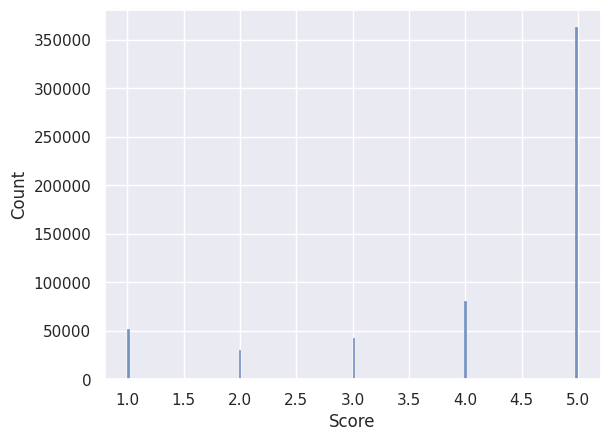

In [ ]:
import seaborn as sns
sns.set()
sns.histplot(df['Score'], kde=False)

In [ ]:
def label2sentiment(label):
    if label == 5:
        return 1
    elif label ==1:
        return 0
    return None
df['sentiment'] = df['Score'].apply(lambda label: label2sentiment(label))
df=df.dropna()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1.0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

model = TfidfVectorizer(max_features = 100, stop_words='english')
X = model.fit_transform(df.Text).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.33, random_state=42)
clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.metrics import accuracy_score
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.8743862669711318


**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=efeb9b20aa0d8d8146f6a8876da9714ee6ce60d8bc8e35d3adb5563c2d52016c
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
neg_df = df[df.sentiment == 0]
pos_df = df[df.sentiment == 1]

train_df = pd.concat([neg_df.head(3500), pos_df.head(3500)])
test_df = pd.concat([neg_df.tail(500), pos_df.tail(500)])
train_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0.0
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.0
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.0
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5542,5543,B000MXENCG,AY4ZF5KEWE76D,"A. Willis ""blah""",0,0,5,1302134400,Does the job,Our pediatrician recommended we feed our const...,1.0
5545,5546,B000G671R8,A1956Z7NWJ4FO3,29GRITS,0,0,5,1244332800,Great snacking!,These are really awesome - the flavor is unexp...,1.0
5547,5548,B0049S1YMM,A2K6HJMJ1PWEHK,Christie A. Kozil,0,0,5,1334880000,Best cajun seasoning!,"We love this seasoning. Easy, fast and great o...",1.0
5548,5549,B004G94ZPW,A3G4YKWXZMPDPT,Charlotte Yoon,4,4,5,1322438400,Best Gummi Bears,I ordered these gummi bears after first trying...,1.0


In [ ]:
from afinn import Afinn
afinn = Afinn()

train_df['afinn_score'] = train_df['Text'].apply(lambda t: afinn.score(t))
test_df['afinn_score'] = test_df['Text'].apply(lambda t: afinn.score(t))
train_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,afinn_score
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,-2.0
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0.0,0.0
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.0,-1.0
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.0,0.0
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5542,5543,B000MXENCG,AY4ZF5KEWE76D,"A. Willis ""blah""",0,0,5,1302134400,Does the job,Our pediatrician recommended we feed our const...,1.0,7.0
5545,5546,B000G671R8,A1956Z7NWJ4FO3,29GRITS,0,0,5,1244332800,Great snacking!,These are really awesome - the flavor is unexp...,1.0,19.0
5547,5548,B0049S1YMM,A2K6HJMJ1PWEHK,Christie A. Kozil,0,0,5,1334880000,Best cajun seasoning!,"We love this seasoning. Easy, fast and great o...",1.0,9.0
5548,5549,B004G94ZPW,A3G4YKWXZMPDPT,Charlotte Yoon,4,4,5,1322438400,Best Gummi Bears,I ordered these gummi bears after first trying...,1.0,5.0


In [ ]:
X_train = pd.DataFrame(data = X_train, columns = model.get_feature_names_out())
X_test = pd.DataFrame(data = X_test, columns = model.get_feature_names_out())
X_train["afinn_score"] = train_df["afinn_score"]
X_test["afinn_score"] = test_df["afinn_score"]

In [ ]:
clf = RandomForestClassifier(max_depth=4, random_state=0, n_jobs=-1)
clf.fit(X_train, train_df.sentiment)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

In [ ]:
y_predict = clf.predict(X_test)
accuracy_afinn = accuracy_score(test_df.sentiment,y_predict)
print(accuracy_afinn)

0.75


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
report_afinn = classification_report(test_df.sentiment, y_predict, output_dict=True)
report_afinn

{'0.0': {'precision': 0.928082191780822,
  'recall': 0.542,
  'f1-score': 0.6843434343434344,
  'support': 500.0},
 '1.0': {'precision': 0.6765536723163842,
  'recall': 0.958,
  'f1-score': 0.793046357615894,
  'support': 500.0},
 'accuracy': 0.75,
 'macro avg': {'precision': 0.8023179320486031,
  'recall': 0.75,
  'f1-score': 0.7386948959796642,
  'support': 1000.0},
 'weighted avg': {'precision': 0.8023179320486031,
  'recall': 0.75,
  'f1-score': 0.7386948959796642,
  'support': 1000.0}}

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
# Define helper functions for feature extraction
def extract_textblob_features(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


# Extract features using TextBlob and Afinn
train_df['TextBlob_Polarity'], train_df['TextBlob_Subjectivity'] = zip(
    *train_df['Text'].apply(extract_textblob_features)
)
test_df['TextBlob_Polarity'], test_df['TextBlob_Subjectivity'] = zip(
    *test_df['Text'].apply(extract_textblob_features)
)
# Split into train and test sets
x_blob_train = train_df[['TextBlob_Polarity', 'TextBlob_Subjectivity']]
x_blob_test = test_df[['TextBlob_Polarity', 'TextBlob_Subjectivity']]
y_train = train_df['sentiment']
y_test = test_df['sentiment']


# Train classifiers
clf_blob = RandomForestClassifier(random_state=42)
clf_blob.fit(x_blob_train, y_train)
y_pred_blob = clf_blob.predict(x_blob_test)

# Evaluate classifiers
accuracy_blob = accuracy_score(y_test, y_pred_blob)
print(accuracy_blob)





0.797


In [ ]:
report_blob = classification_report(y_test, y_pred_blob, output_dict=True)
report_blob

{'0.0': {'precision': 0.813953488372093,
  'recall': 0.77,
  'f1-score': 0.7913669064748201,
  'support': 500.0},
 '1.0': {'precision': 0.7817836812144212,
  'recall': 0.824,
  'f1-score': 0.8023369036027264,
  'support': 500.0},
 'accuracy': 0.797,
 'macro avg': {'precision': 0.7978685847932572,
  'recall': 0.7969999999999999,
  'f1-score': 0.7968519050387732,
  'support': 1000.0},
 'weighted avg': {'precision': 0.7978685847932572,
  'recall': 0.797,
  'f1-score': 0.7968519050387732,
  'support': 1000.0}}

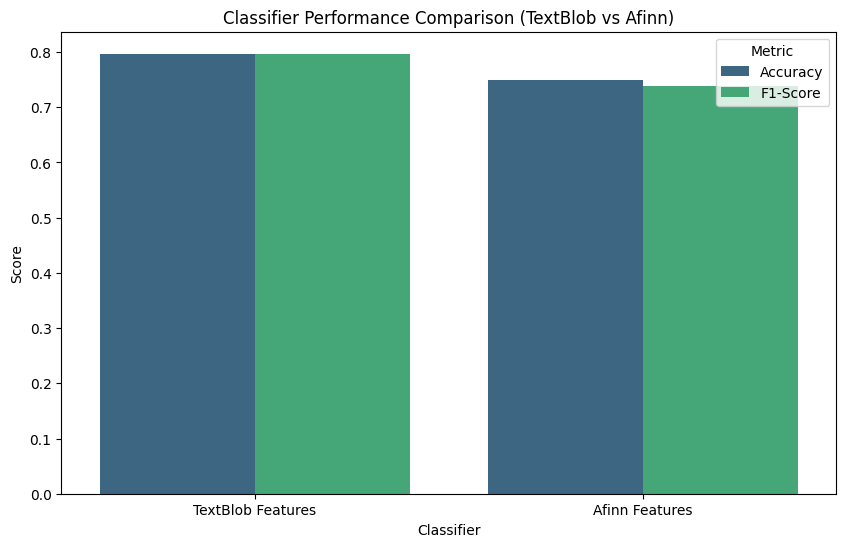

In [ ]:
import seaborn as sns
results = pd.DataFrame({
    "Classifier": ["TextBlob Features", "Afinn Features"],
    "Accuracy": [accuracy_blob, accuracy_afinn],
    "F1-Score": [
        report_blob['weighted avg']['f1-score'],
        report_afinn['weighted avg']['f1-score']
    ]
})

# Prepare data for seaborn
results_melted = results.melt(id_vars="Classifier", var_name="Metric", value_name="Score")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Classifier", y="Score", hue="Metric", palette="viridis")
plt.title("Classifier Performance Comparison (TextBlob vs Afinn)")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.legend(title="Metric")
plt.show()


**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [ ]:
!pip install transformers

In [ ]:
!kaggle datasets list -s "Sentiment140 dataset with 1.6 million tweets"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!mkdir ./datasets
!mkdir ./datasets/sentiment140
!kaggle datasets files kazanova/sentiment140

name                                        size  creationDate         
-----------------------------------------  -----  -------------------  
training.1600000.processed.noemoticon.csv  228MB  2019-09-21 02:36:07  


In [ ]:
!kaggle datasets download kazanova/sentiment140 -f training.1600000.processed.noemoticon.csv -p ./datasets/sentiment140
!unzip ./datasets/sentiment140/*.zip  -d ./datasets/sentiment140
!ls ./datasets/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
100% 80.9M/80.9M [00:01<00:00, 57.0MB/s]
100% 80.9M/80.9M [00:01<00:00, 46.9MB/s]
Archive:  ./datasets/sentiment140/training.1600000.processed.noemoticon.csv.zip
  inflating: ./datasets/sentiment140/training.1600000.processed.noemoticon.csv  
training.1600000.processed.noemoticon.csv  training.1600000.processed.noemoticon.csv.zip


In [ ]:
import pandas as pd

data = pd.read_csv("/content/datasets/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
data = data.rename(columns={0: 'sentiment', 1: 'id', 2: 'date', 3: 'query', 4: 'user', 5: 'text'})
data = data.drop(columns=['id', 'date', 'query', 'user'])
data['sentiment'] = data['sentiment'].map({0: 0, 2: 1, 4: 2})
data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,2,Just woke up. Having no school is the best fee...
1599996,2,TheWDB.com - Very cool to hear old Walt interv...
1599997,2,Are you ready for your MoJo Makeover? Ask me f...
1599998,2,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# Load the pre-trained RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

def get_embeddings(text, tokinizer, model):
  # Tokenize the text and prepare it to be input to the model
  tokens = tokenizer.encode(text, add_special_tokens=True)
  tokens_tensor = torch.tensor(tokens).unsqueeze(0)

  # Get the RoBERTa model's output for the text
  outputs = model(tokens_tensor)

  # Extract the last hidden state of the RoBERTa model output
  last_hidden_state = outputs.last_hidden_state

  # Get the vector embeddings for the tokens in the text
  return last_hidden_state.squeeze(0).detach().numpy()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
vectors_list = []
sampled_df = data.sample(n=5000)
texts = sampled_df["text"].apply(lambda t: t[:514]).values
for text in tqdm(texts):
    vectors_list.append(get_embeddings(text, tokenizer, model))
vectors_list

100%|██████████| 5000/5000 [12:47<00:00,  6.51it/s]


[array([[-0.10059091,  0.06898151, -0.01992683, ..., -0.16417362,
         -0.09434465, -0.01879054],
        [ 0.05894781,  0.05212984, -0.09734161, ...,  0.12249907,
          0.09142756, -0.11684825],
        [ 0.06163865,  0.0628745 ,  0.01393189, ...,  0.03649101,
         -0.0286132 , -0.0478867 ],
        ...,
        [ 0.06426492,  0.22625552, -0.0832176 , ...,  0.03286936,
         -0.15220298,  0.13625078],
        [ 0.04298695, -0.08609598,  0.08879972, ..., -0.2849847 ,
         -0.04626251,  0.1729498 ],
        [ 0.00550087, -0.12452958,  0.06932646, ..., -0.09844913,
         -0.08402821,  0.02305599]], dtype=float32),
 array([[-0.02718091,  0.03362168, -0.00274183, ..., -0.11908245,
         -0.0521766 ,  0.01356838],
        [-0.283504  ,  0.01015723, -0.04767128, ..., -0.29470193,
          0.11776178, -0.08859279],
        [-0.03113794,  0.23085895,  0.02341863, ...,  0.0646657 ,
          0.12600903,  0.07507405],
        ...,
        [ 0.11640088, -0.10154092,  0.1

In [ ]:
vectors_list2 = [v[0] for v in vectors_list]
cols = [f"Feature {i}" for i in range(len(vectors_list2[0]))]
v_df = pd.DataFrame(data = vectors_list2,columns=cols)
v_df = v_df.dropna()
v_df['sentiment'] = sampled_df['sentiment'].values
v_df.groupby('sentiment').size()

,0
sentiment,
0,2493
2,2507


In [ ]:
v_df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 759,Feature 760,Feature 761,Feature 762,Feature 763,Feature 764,Feature 765,Feature 766,Feature 767,sentiment
0,-0.100591,0.068982,-0.019927,-0.148007,0.079172,-0.086545,-0.015942,0.022912,0.068203,-0.091260,...,0.009809,-0.075155,-0.087861,-0.024812,0.055051,0.084538,-0.164174,-0.094345,-0.018791,2
1,-0.027181,0.033622,-0.002742,-0.111662,0.061633,-0.113773,-0.036913,0.004629,0.054290,-0.059176,...,0.023100,-0.085125,-0.074994,0.010793,0.090945,0.087104,-0.119082,-0.052177,0.013568,2
2,-0.058942,0.049691,-0.016507,-0.184757,0.068194,-0.106289,-0.024552,0.026738,0.021599,-0.059246,...,-0.047637,-0.039904,-0.094545,-0.013710,0.095978,0.108852,-0.137880,-0.074524,-0.027900,2
3,-0.043080,0.031419,0.003751,-0.100282,0.034985,-0.138541,-0.050753,0.019681,0.089058,-0.047023,...,-0.006833,-0.060768,-0.065314,-0.004099,0.103021,0.095611,-0.116254,-0.077478,-0.001536,2
4,-0.060575,0.075156,-0.002245,-0.141479,0.059907,-0.101720,-0.029543,0.015295,0.057765,-0.036150,...,-0.023500,-0.046958,-0.080914,-0.020350,0.129232,0.074041,-0.099556,-0.080787,-0.024576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.045599,0.056233,-0.030652,-0.135099,0.033478,-0.099186,-0.022934,-0.032183,0.059368,-0.048446,...,-0.022097,-0.088524,-0.050620,-0.009731,0.116588,0.095576,-0.137807,-0.090733,0.029931,2
4996,-0.050315,0.039638,0.016012,-0.118453,0.060869,-0.130563,-0.034253,0.062790,0.057979,-0.028025,...,0.000276,-0.093215,-0.078757,0.032735,0.089727,0.075695,-0.087409,-0.066656,-0.015935,0
4997,-0.070177,0.040154,-0.012291,-0.104432,0.028148,-0.074050,-0.056142,0.007570,0.076787,-0.060267,...,-0.005202,-0.103014,-0.071064,-0.012944,0.109775,0.140230,-0.095740,-0.052330,0.011066,0
4998,-0.060211,0.053635,-0.010323,-0.122640,0.037471,-0.151126,-0.024047,0.029360,0.061015,-0.063859,...,0.025310,-0.082025,-0.060679,0.002489,0.106565,0.119784,-0.095652,-0.068990,-0.001575,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

pos_df = v_df[v_df["sentiment"] == 2]
neg_df = v_df[v_df["sentiment"] == 0]
train_df = pd.concat([neg_df.head(1400), pos_df.head(1400)])
test_df = pd.concat([neg_df.tail(500), pos_df.tail(500)])
train_df

X_train, X_test =  train_df, test_df
y_train, y_test =  train_df['sentiment'], test_df['sentiment']
X_train = X_train.drop("sentiment", axis=1)
X_test = X_test.drop("sentiment", axis=1)

clf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=100, n_jobs=-1 )
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict), roc_auc_score(y_test,y_predict))

0.701 0.7009999999999998


In [ ]:
import pandas as pd
from textblob import TextBlob
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def add_features(df):
    # Text length
    df['text_length'] = df['text'].apply(len)  # Total character count

    # TextBlob-based features
    df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Polarity score
    df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)  # Subjectivity score

    # spaCy-based features
    def spacy_features(text):
        doc = nlp(text)
        noun_count = sum(1 for token in doc if token.pos_ == "NOUN")  # Count nouns
        verb_count = sum(1 for token in doc if token.pos_ == "VERB")  # Count verbs
        entity_count = len(doc.ents)  # Total named entities
        org_count = sum(1 for ent in doc.ents if ent.label_ == "ORG")  # Organization entities
        return noun_count, verb_count, entity_count, org_count

    spacy_results = df['text'].apply(spacy_features)
    df[['noun_count', 'verb_count', 'entity_count', 'org_count']] = pd.DataFrame(spacy_results.tolist(), index=df.index)

    # Word-level statistics
    df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Total words

    return df

Improving by adding additional features

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from textblob import TextBlob
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

sampled_df = add_features(sampled_df)

v_df['text_length'] = sampled_df['text_length'].values
v_df['polarity'] = sampled_df['polarity'].values
v_df['subjectivity'] = sampled_df['subjectivity'].values
v_df['noun_count'] = sampled_df['noun_count'].values
v_df['verb_count'] = sampled_df['verb_count'].values
v_df['entity_count'] = sampled_df['entity_count'].values
v_df['org_count'] = sampled_df['org_count'].values
v_df['avg_word_length'] = sampled_df['avg_word_length'].values
v_df['word_count'] = sampled_df['word_count'].values

pos_df = v_df[v_df["sentiment"] == 2]
pos_df['sentiment'] = pos_df['sentiment'].map({2:1})
neg_df = v_df[v_df["sentiment"] == 0]
train_df = pd.concat([neg_df.head(1400), pos_df.head(1400)])
test_df = pd.concat([neg_df.tail(500), pos_df.tail(500)])


X_train, X_test =  train_df, test_df
y_train, y_test =  train_df['sentiment'], test_df['sentiment']
X_train = X_train.drop("sentiment", axis=1)
X_test = X_test.drop("sentiment", axis=1)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',       # Evaluation metric
    'max_depth': 6,                 # Maximum depth of trees
    'learning_rate': 0.1,           # Step size shrinkage
    'n_estimators': 100,            # Number of boosting rounds
    'random_state': 42              # Random seed
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred_proba = xgb_model.predict(dtest)
y_predict = (y_pred_proba > 0.5).astype(int)
print(accuracy_score(y_test,y_predict), roc_auc_score(y_test,y_predict))



<ipython-input-22-87c19752af69>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['sentiment'] = pos_df['sentiment'].map({2:1})
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:15:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


0.745 0.745
